In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import ToolBox as tb

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
X = pd.read_csv('data\clean_data\clean_features.csv')
y = pd.read_csv('data\clean_data\clean_target_gpa.csv')['GPA']

In [7]:
info_col={'StudentID': 'A unique identifier assigned to each student (1001 to 3392).',
                    'Age': 'The age of the students ranges from 15 to 18 years.',
                    'Gender': ' Gender of the students, where 0 represents Male and 1 represents Female.',
                    'Ethnicity': ' The ethnicity of the students, coded as \n 0: Caucasian \n 1: African American \n 2: Asian \n 3: Other',
                    'ParentalEducation': "The education level of the parents, coded as \n 0: None \n 1: High School \n 2: Some College \n 3: Bachelor's \n 4: Higher",
                    'StudyTimeWeekly': 'Weekly study time in hours, ranging from 0 to 20.',
                    'Absences': 'Number of absences during the school year, ranging from 0 to 30.',
                    'Tutoring': 'Tutoring status, where 0 indicates No and 1 indicates Yes.',
                    'ParentalSupport': 'The level of parental support, coded as \n 0: None \n 1: Low \n 2: Moderate \n 3: High \n 4: Very High',
                    'Extracurricular': 'Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.',
                    'Sports': 'Participation in sports, where 0 indicates No and 1 indicates Yes.',
                    'Music': 'Participation in music activities, where 0 indicates No and 1 indicates Yes.',
                    'Volunteering': 'Participation in volunteering, where 0 indicates No and 1 indicates Yes.',
                    'GPA': 'Grade Point Average on a scale from 0.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.',
                    'GradeClass': "Classification of student's grades based on GPA: \n 0: 'A' (GPA >= 3.5) \n 1: 'B' (3.0 <= GPA < 3.5) \n 2: 'C' (2.5 <= GPA < 3.0)\n 3: 'D' (2.0 <= GPA < 2.5)\n 4: 'F' (GPA < 2.0)."
                   }

In [8]:
X['ParentalSupport'] = X['ParentalSupport'].fillna('None')
X['ParentalEducation'] = X['ParentalEducation'].fillna('None')

# Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

In [10]:
variables_numericas=['StudyTimeWeekly','Absences']
variables_categoricas=[i for i in X.columns if i not in variables_numericas]

# Variables numéricas

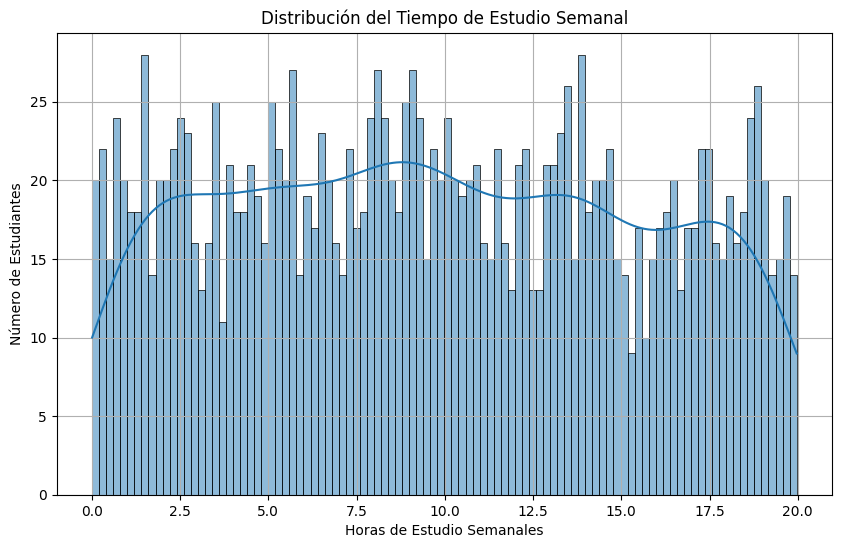

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

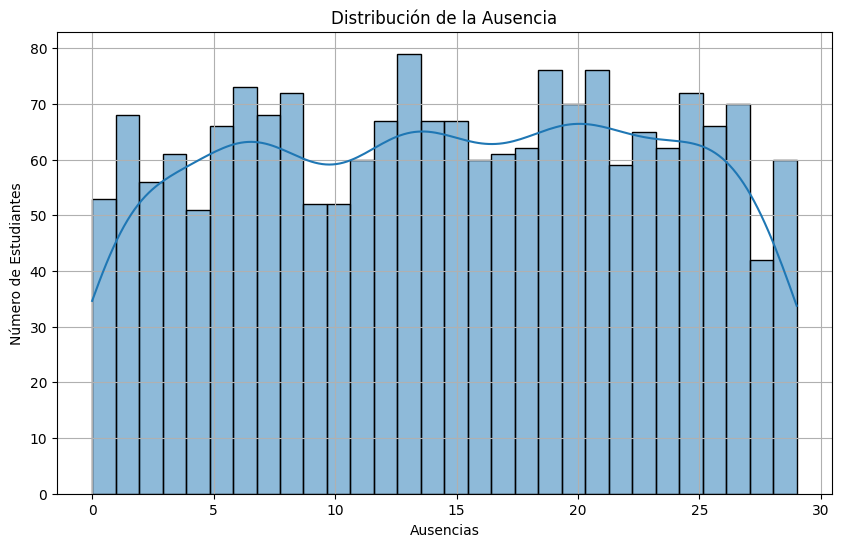

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

In [13]:
scaler = StandardScaler()
X_train[variables_numericas] = scaler.fit_transform(X_train[variables_numericas])

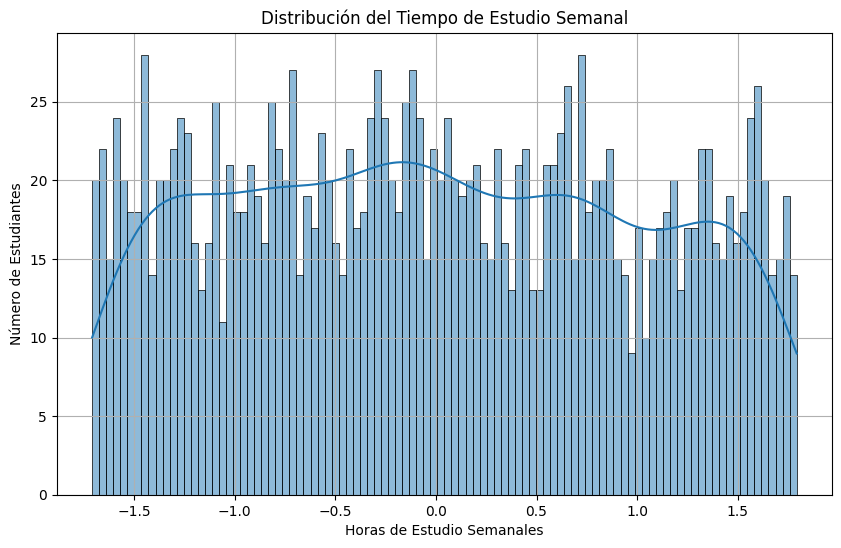

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['StudyTimeWeekly'], bins=100, kde=True)
plt.title('Distribución del Tiempo de Estudio Semanal')
plt.xlabel('Horas de Estudio Semanales')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

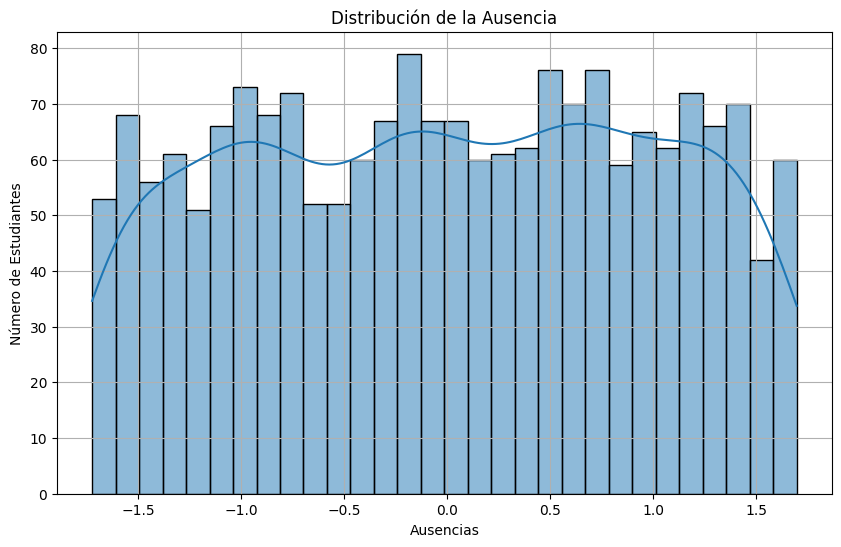

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train['Absences'], bins=30, kde=True)
plt.title('Distribución de la Ausencia')
plt.xlabel('Ausencias')
plt.ylabel('Número de Estudiantes')
plt.grid(True)
plt.show()

In [16]:
df_num=X_train[['StudyTimeWeekly','Absences']]
df_num_target=pd.concat([df_num,y_train], axis=1, ignore_index=True)
df_num_target = df_num_target.rename(columns={0: 'StudyTimeWeekly', 1: 'Absences', 2: 'GPA'})
df_num_target

,StudyTimeWeekly,Absences,GPA
642,1.468159,1.105915,1.396278
1752,-1.276773,0.516509,0.754751
1401,-1.103632,1.223797,0.136166
2032,1.068117,1.223797,1.172192
990,-1.526524,0.516509,1.747356
...,...,...,...
1638,0.586521,-0.190779,1.595627
1095,-1.331151,0.516509,1.523945
1130,-1.083254,-0.072898,2.051919
1294,-0.937671,0.634390,1.348997


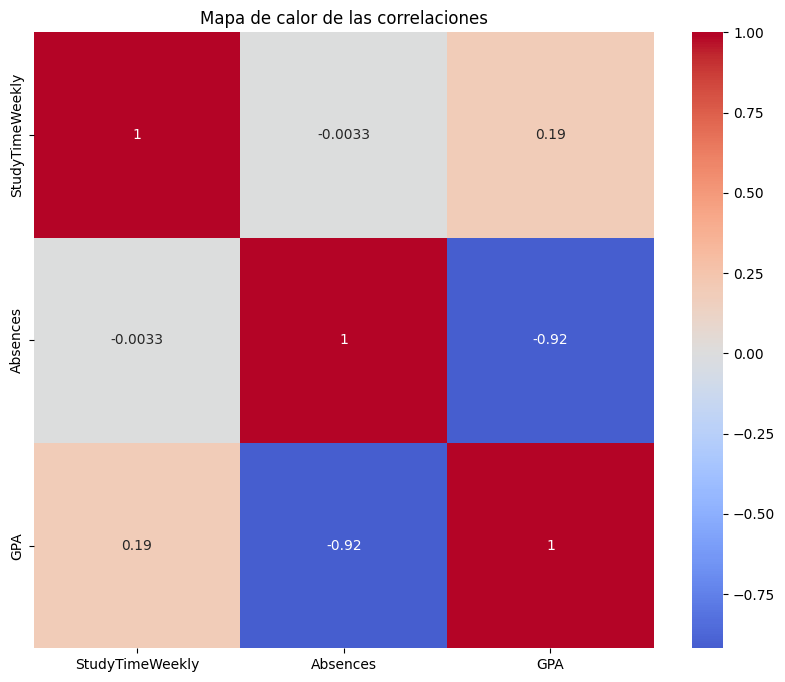

In [17]:
correlation_matrix = df_num_target.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de calor de las correlaciones')
plt.show()

# Descartamos la feature Absences por multicolinealidad

In [18]:
features_num=['StudyTimeWeekly']

In [19]:
tb.get_features_num_regression(df_num_target,'GPA',0.15)

['StudyTimeWeekly', 'Absences', 'GPA']

# Variables Categoricas

In [20]:
l=variables_categoricas.copy()
l.append('GPA')

In [21]:
d={i:j for i,j in enumerate(l)}
d

{0: 'Age',
 1: 'Gender',
 2: 'Ethnicity',
 3: 'ParentalEducation',
 4: 'Tutoring',
 5: 'ParentalSupport',
 6: 'Extracurricular',
 7: 'Sports',
 8: 'Music',
 9: 'Volunteering',
 10: 'GPA'}

In [25]:
df_cat=X_train[variables_categoricas]
df_cat_target=pd.concat([df_cat,y_train], axis=1, ignore_index=True)
df_cat_target=df_cat_target.rename(columns=d)
df_cat_target

,Age,Gender,Ethnicity,ParentalEducation,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
642,18,Female,Caucasian,Higher,1,None,1,1,0,0,1.396278
1752,16,Female,Other,Some College,0,Low,0,0,0,1,0.754751
1401,17,Male,Asian,Bachelor's,0,None,0,0,0,0,0.136166
2032,17,Female,Caucasian,High School,1,Moderate,0,0,0,0,1.172192
990,16,Male,Caucasian,None,1,Moderate,0,0,1,0,1.747356
...,...,...,...,...,...,...,...,...,...,...,...
1638,15,Male,African American,None,1,Low,0,0,0,0,1.595627
1095,16,Male,Caucasian,Some College,0,Very High,0,1,0,0,1.523945
1130,16,Female,Caucasian,Some College,1,Moderate,1,1,0,0,2.051919
1294,18,Male,Other,Some College,0,High,0,0,0,0,1.348997


In [32]:
tb.get_features_cat_regression(df_cat_target,'GPA',0.05)

['ParentalSupport']

In [37]:
tb.get_features_cat_regression(df_cat_target,'GPA',0.4)

['Ethnicity', 'ParentalEducation', 'ParentalSupport']

# Modelo

In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [99]:
X = pd.read_csv('data\clean_data\clean_features.csv')
y = pd.read_csv('data\clean_data\clean_target_gpa.csv')['GPA']

In [100]:
X['ParentalSupport'] = X['ParentalSupport'].fillna('None')
X['ParentalEducation'] = X['ParentalEducation'].fillna('None')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
features_num=['StudyTimeWeekly']
features_cat_1=['ParentalSupport']
features_cat_2=['Ethnicity', 'ParentalEducation', 'ParentalSupport']
features_cat_3=[i for i in X_train.columns if i not in ['StudyTimeWeekly','Absences']] #todas las categoricas

In [103]:
# Escalar la variable objetivo
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Modelo con StudyTimeWeekly y  ParentalSupport

## Preprocesado

In [106]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat_1)])

# Modelo LinearRegresor

In [107]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train[['StudyTimeWeekly','ParentalSupport']], y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test[['StudyTimeWeekly','ParentalSupport']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7811933251304684


# Modelo con ElasticNet

In [108]:
from sklearn.linear_model import ElasticNet

# Crear el modelo
elasticnet_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', ElasticNet())])

# Entrenar el modelo
elasticnet_model.fit(X_train[['StudyTimeWeekly','ParentalSupport']], y_train_scaled.ravel())

# Hacer predicciones
elasticnet_y_pred_scaled = elasticnet_model.predict(X_test[['StudyTimeWeekly','ParentalSupport']])

elasticnet_y_pred = target_scaler.inverse_transform(elasticnet_y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
elasticnet_mse = mean_squared_error(y_test, elasticnet_y_pred)
print(f'ElasticNet Mean Squared Error: {elasticnet_mse}')

ElasticNet Mean Squared Error: 0.8275728556374252


# Modelo con  XGBoost

In [109]:
# Crear el modelo XGBoost
xgboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', xgb.XGBRegressor(objective='reg:squarederror'))])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.3],
    'regressor__scale_pos_weight': [1, 10, 50]  # Ajuste este valor según el ratio de desbalanceo de su target
}

# Crear el GridSearchCV
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train[['StudyTimeWeekly','ParentalSupport']], y_train_scaled.ravel())

# Obtener las mejores predicciones
y_pred_scaled = grid_search.best_estimator_.predict(X_test[['StudyTimeWeekly','ParentalSupport']])

# Desescalar las predicciones
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
print(f'Best parameters found: {grid_search.best_params_}')
xgboost_mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Mean Squared Error: {xgboost_mse}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__scale_pos_weight': 1}
XGBoost Mean Squared Error: 0.7964334895072627


# Modelo con StudyTimeWeekly, 'Ethnicity' 'ParentalEducation' y 'ParentalSupport'

In [111]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_num),
        ('cat', categorical_transformer, features_cat_2)])

# Modelo con LinearRegression

In [114]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train[['StudyTimeWeekly','Ethnicity','ParentalEducation','ParentalSupport']], y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test[['StudyTimeWeekly','Ethnicity','ParentalEducation','ParentalSupport']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.7832633162226513


# Modelo con ElasticNet

In [115]:
# Crear el modelo
elasticnet_model = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', ElasticNet())])

# Entrenar el modelo
elasticnet_model.fit(X_train[['StudyTimeWeekly','Ethnicity','ParentalEducation','ParentalSupport']], y_train_scaled.ravel())

# Hacer predicciones
elasticnet_y_pred_scaled = elasticnet_model.predict(X_test[['StudyTimeWeekly','Ethnicity','ParentalEducation','ParentalSupport']])

elasticnet_y_pred = target_scaler.inverse_transform(elasticnet_y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
elasticnet_mse = mean_squared_error(y_test, elasticnet_y_pred)
print(f'ElasticNet Mean Squared Error: {elasticnet_mse}')

ElasticNet Mean Squared Error: 0.8275728556374252


# Modelo con XGBoost

In [116]:
# Crear el modelo XGBoost
xgboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', xgb.XGBRegressor(objective='reg:squarederror'))])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.3],
    'regressor__scale_pos_weight': [1, 10, 50]  # Ajuste este valor según el ratio de desbalanceo de su target
}

# Crear el GridSearchCV
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train[['StudyTimeWeekly','Ethnicity','ParentalEducation','ParentalSupport']], y_train_scaled.ravel())

# Obtener las mejores predicciones
y_pred_scaled = grid_search.best_estimator_.predict(X_test[['StudyTimeWeekly','Ethnicity','ParentalEducation','ParentalSupport']])

# Desescalar las predicciones
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
print(f'Best parameters found: {grid_search.best_params_}')
xgboost_mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Mean Squared Error: {xgboost_mse}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__scale_pos_weight': 1}
XGBoost Mean Squared Error: 0.7970238038189826


# Modelo con todas las variables numéricas

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['StudyTimeWeekly','Absences']),
        ('cat', categorical_transformer, features_cat_1)])

# Modelo con LinearRegresion

In [139]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train[['StudyTimeWeekly','Absences','ParentalSupport']], y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test[['StudyTimeWeekly','Absences','ParentalSupport']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}\n')
regressor = model.named_steps['regressor']
coefficients = regressor.coef_
intercept = regressor.intercept_
# Mostrar los coeficientes y el intercepto
print(f'Coeficientes: {coefficients}')
print(f'Intercepto: {intercept}')

Mean Squared Error: 0.06747069337270818

Coeficientes: [ 0.18588008 -0.9198525   0.16391447 -0.15030323 -0.00405882 -0.33730519
  0.32775277]
Intercepto: -0.023710995060355983


In [121]:
# Crear el modelo XGBoost
xgboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', xgb.XGBRegressor(objective='reg:squarederror'))])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.3],
    'regressor__scale_pos_weight': [1, 10, 50]  # Ajuste este valor según el ratio de desbalanceo de su target
}

# Crear el GridSearchCV
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train[['StudyTimeWeekly','Absences','ParentalSupport']], y_train_scaled.ravel())

# Obtener las mejores predicciones
y_pred_scaled = grid_search.best_estimator_.predict(X_test[['StudyTimeWeekly','Absences','ParentalSupport']])

# Desescalar las predicciones
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
print(f'Best parameters found: {grid_search.best_params_}')
xgboost_mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Mean Squared Error: {xgboost_mse}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__scale_pos_weight': 1}
XGBoost Mean Squared Error: 0.07250931480110447


# Modelo con todas las features numéricas 'Ethnicity' 'ParentalEducation' y 'ParentalSupport'

In [123]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['StudyTimeWeekly','Absences']),
        ('cat', categorical_transformer, features_cat_2)])

# Modelo con LinearRegression

In [125]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train[['StudyTimeWeekly','Absences','Ethnicity','ParentalEducation','ParentalSupport']], y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test[['StudyTimeWeekly','Absences','Ethnicity','ParentalEducation','ParentalSupport']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.06787986664818539


# Modelo con XGBoost

In [126]:
# Crear el modelo XGBoost
xgboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', xgb.XGBRegressor(objective='reg:squarederror'))])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.3],
    'regressor__scale_pos_weight': [1, 10, 50]  # Ajuste este valor según el ratio de desbalanceo de su target
}

# Crear el GridSearchCV
grid_search = GridSearchCV(xgboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Entrenar el modelo
grid_search.fit(X_train[['StudyTimeWeekly','Absences','Ethnicity','ParentalEducation','ParentalSupport']], y_train_scaled.ravel())

# Obtener las mejores predicciones
y_pred_scaled = grid_search.best_estimator_.predict(X_test[['StudyTimeWeekly','Absences','Ethnicity','ParentalEducation','ParentalSupport']])

# Desescalar las predicciones
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
print(f'Best parameters found: {grid_search.best_params_}')
xgboost_mse = mean_squared_error(y_test, y_pred)
print(f'XGBoost Mean Squared Error: {xgboost_mse}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__scale_pos_weight': 1}
XGBoost Mean Squared Error: 0.07290531961294909


# Conclusiones:

- El mejor modelo parece ser LinearRegresion a pesar de no haber ajustado los hiperparametros como si se ha hecho para XGBoost
- Efectivamente, las features categoricas no parecen tener demasiada relevancia. Unicamente destaca 'Parental Support'.
- El modelo funciona decentemente (MSE=0.8) sin haber añadido 'Absences' que tiene una correlación de -0.9 con la variable de target.
- Una vez añadida la variable de target, el modelo funciona muy bien, siendo el resultado un MSE=0.067 con únicamente 3 features

Vamos a investigar más acerca de la importancia de dichas features ya que es posible que el modelo pueda ser escrito como un modelo de regresion linear de una única feature.

# Modelo con únicamente 'Absences'

In [141]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Absences'])])

# Con LinearRegression:

In [142]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train[['Absences']], y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test[['Absences']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}\n')
regressor = model.named_steps['regressor']
coefficients = regressor.coef_
intercept = regressor.intercept_

# Mostrar los coeficientes y el intercepto
print(f'Coeficientes: {coefficients}')
print(f'Intercepto: {intercept}')

Mean Squared Error: 0.12588012169314824

Coeficientes: [-0.91894094]
Intercepto: -6.319353020924003e-17


# Despues de este analisis, nos vamos a quedar con el modelo que utiliza LinearRegresion y las features 'Absences', 'StudyTimeWeekly' y 'ParentalSupport'.

In [143]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['StudyTimeWeekly','Absences']),
        ('cat', categorical_transformer, ['ParentalSupport'])])

In [145]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train[['StudyTimeWeekly','Absences','ParentalSupport']], y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test[['StudyTimeWeekly','Absences','ParentalSupport']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.06747069337270818


# Otro modelo con más hiperparámetros

In [144]:
# Definir los transformadores
numeric_features = ['StudyTimeWeekly', 'Absences']
categorical_features = ['ParentalSupport']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Crear el pipeline con Ridge en lugar de LinearRegression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge())])

# Definir la rejilla de hiperparámetros
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0, 100.0]  # Valores típicos para la regularización
}

# Crear el GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entrenar el modelo con la búsqueda de hiperparámetros
grid_search.fit(X_train[['StudyTimeWeekly', 'Absences', 'ParentalSupport']], y_train_scaled.ravel())

# Obtener las mejores predicciones
y_pred_scaled = grid_search.best_estimator_.predict(X_test[['StudyTimeWeekly', 'Absences', 'ParentalSupport']])

# Desescalar las predicciones
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Best parameters found: {grid_search.best_params_}')

# Obtener los coeficientes del mejor modelo
best_model = grid_search.best_estimator_.named_steps['regressor']
coefficients = best_model.coef_
intercept = best_model.intercept_

# Mostrar los coeficientes y el intercepto
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
print(f'Feature Names: {feature_names}')
print(f'Coeficientes: {coefficients}')
print(f'Intercepto: {intercept}')

Mean Squared Error: 0.06747386223273152
Best parameters found: {'regressor__alpha': 0.1}
Feature Names: ['num__StudyTimeWeekly' 'num__Absences' 'cat__ParentalSupport_High'
 'cat__ParentalSupport_Low' 'cat__ParentalSupport_Moderate'
 'cat__ParentalSupport_None' 'cat__ParentalSupport_Very High']
Coeficientes: [ 0.18587247 -0.91980376  0.16387406 -0.15027537 -0.00407025 -0.33711022
  0.32758178]
Intercepto: -0.023699034595894754


# Finalemente podemos concluir que el modelo más sencillo es el LinearRegression con las tres features indicadas

### Guardamos el modelo:

In [148]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['StudyTimeWeekly','Absences']),
        ('cat', categorical_transformer, ['ParentalSupport'])])

In [149]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train[['StudyTimeWeekly','Absences','ParentalSupport']], y_train_scaled.ravel())

y_pred_scaled = model.predict(X_test[['StudyTimeWeekly','Absences','ParentalSupport']])

y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.06747069337270818


In [150]:
import pickle

with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Modelo guardado como 'linear_regression_model.pkl'.")

Modelo guardado como 'linear_regression_model.pkl'.


# verificamos

In [151]:
# Cargar el modelo entrenado
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Usar el modelo cargado para hacer predicciones
y_pred_scaled = loaded_model.predict(X_test[['StudyTimeWeekly', 'Absences', 'ParentalSupport']])
y_pred = target_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error after loading the model: {mse}')

Mean Squared Error after loading the model: 0.06747069337270818


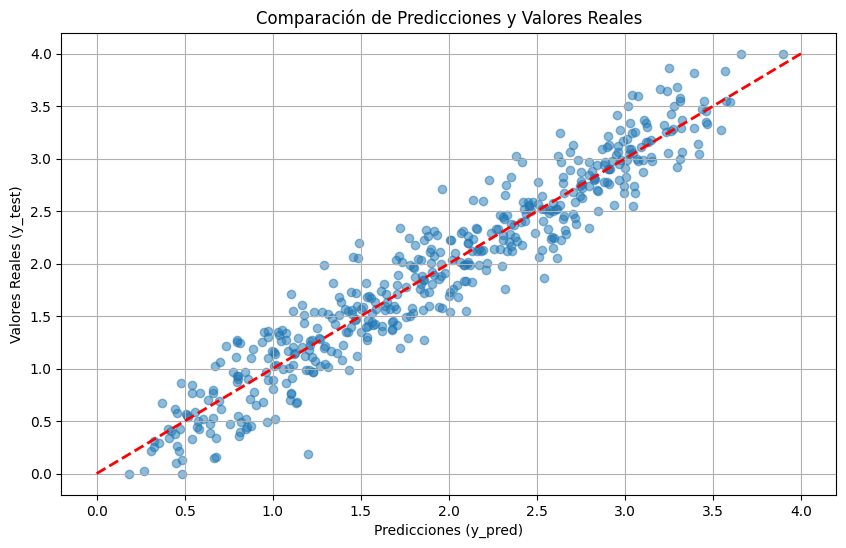

In [152]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Predicciones (y_pred)')
plt.ylabel('Valores Reales (y_test)')
plt.title('Comparación de Predicciones y Valores Reales')
plt.grid(True)
plt.show()

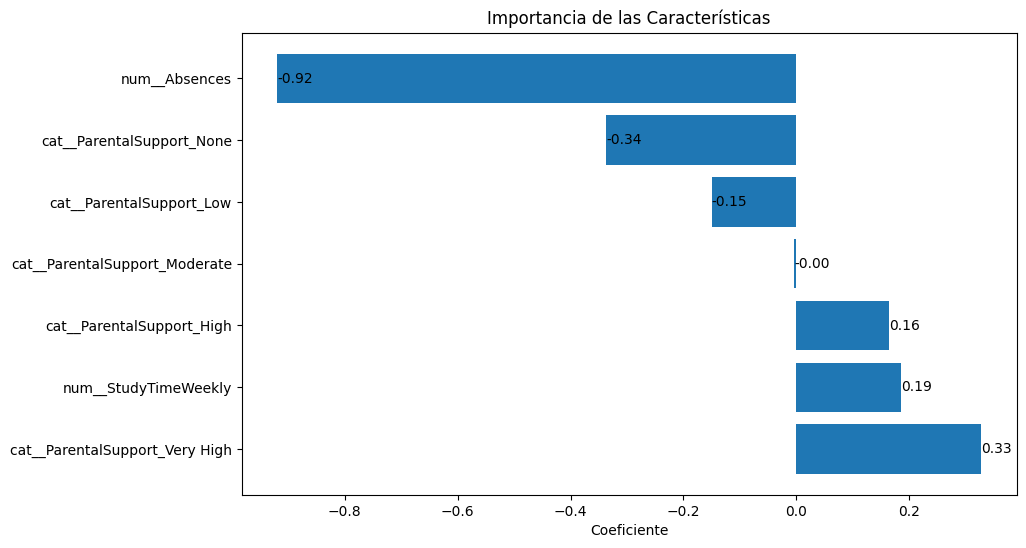

In [158]:
# Obtener nombres de las características
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Visualizar las características importantes
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coeficiente')
plt.title('Importancia de las Características')

# Añadir etiquetas de valores a las barras
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center')

plt.show()

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluar el modelo con varias métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 0.06747069337270818
Mean Absolute Error (MAE): 0.20416984158519363
Root Mean Squared Error (RMSE): 0.2597512143815851
R² Score: 0.9184084746110346
